In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Crimes.csv')

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,11798117,JC397040,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15
1,11798223,JC397365,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44
2,11797883,JC396936,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63
3,11797909,JC397003,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46
4,11797926,JC396947,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46


In [4]:
print(len(df), df.columns)

161942 Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area'],
      dtype='object')


IUCR - The Illinois Unifrom Crime Reporting code

Beat - Geographic area of the city broken down for patrol and statistical purposes.

Battery - Battery is a criminal offense involving unlawful physical contact, distinct from assault which is the act of creating apprehension of such contact.

In [5]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    569
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      7
Community Area            0
dtype: int64

In [6]:
df['Domestic'].value_counts()

False    134556
True      27386
Name: Domestic, dtype: int64

In [7]:
df['IUCR'].value_counts()

486     15051
820     13842
460     10565
560      8847
810      8790
        ...  
1525        1
1481        1
551         1
4740        1
5114        1
Name: IUCR, Length: 306, dtype: int64

In [8]:
df['Primary Type'].value_counts()

THEFT                                38203
BATTERY                              31728
CRIMINAL DAMAGE                      16806
ASSAULT                              13219
OTHER OFFENSE                        10761
DECEPTIVE PRACTICE                   10630
NARCOTICS                             8767
BURGLARY                              5824
MOTOR VEHICLE THEFT                   5712
ROBBERY                               4903
CRIMINAL TRESPASS                     4298
WEAPONS VIOLATION                     4063
OFFENSE INVOLVING CHILDREN            1478
INTERFERENCE WITH PUBLIC OFFICER      1016
PUBLIC PEACE VIOLATION                1003
CRIM SEXUAL ASSAULT                    996
SEX OFFENSE                            771
PROSTITUTION                           455
HOMICIDE                               311
ARSON                                  222
LIQUOR LAW VIOLATION                   146
STALKING                               141
CONCEALED CARRY LICENSE VIOLATION      133
KIDNAPPING 

In [9]:
df['Arrest'].value_counts()

False    127670
True      34272
Name: Arrest, dtype: int64

In [23]:
grouped = df[['Primary Type', 'Arrest']]

In [24]:
print(grouped)

               Primary Type  Arrest
0                     THEFT    True
1           CRIMINAL DAMAGE   False
2         WEAPONS VIOLATION   False
3         WEAPONS VIOLATION   False
4                   BATTERY    True
...                     ...     ...
161937          SEX OFFENSE    True
161938   DECEPTIVE PRACTICE   False
161939   DECEPTIVE PRACTICE   False
161940   DECEPTIVE PRACTICE   False
161941  MOTOR VEHICLE THEFT   False

[161942 rows x 2 columns]


In [32]:
primary_type_arrests = grouped[grouped['Arrest'] == True]['Primary Type'].value_counts()

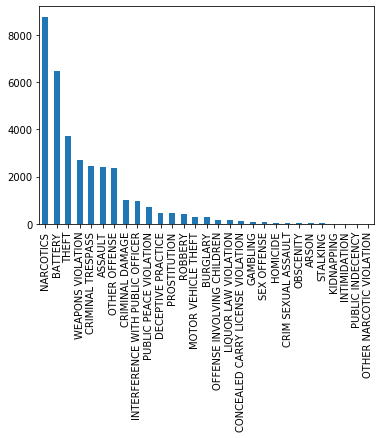

In [42]:
primary_type_arrests.plot.bar()

In [43]:
domestic_arrest = df[['Domestic','Arrest']]

In [44]:
print(domestic_arrest)

        Domestic  Arrest
0          False    True
1          False   False
2          False   False
3          False   False
4          False    True
...          ...     ...
161937     False    True
161938     False   False
161939     False   False
161940     False   False
161941     False   False

[161942 rows x 2 columns]


In [46]:
domestic_arrest_count = domestic_arrest[domestic_arrest['Domestic'] == True]['Arrest'].value_counts()

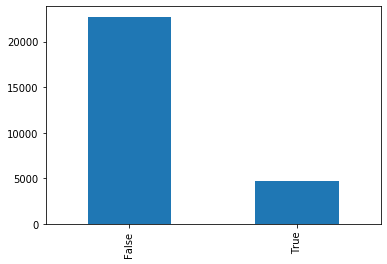

In [47]:
domestic_arrest_count.plot.bar()